Data Analytics 2
Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [19]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
df["Purchased"].describe()

count    400.000000
mean       0.357500
std        0.479864
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Purchased, dtype: float64

In [22]:
df["Age"].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

<Axes: ylabel='Purchased'>

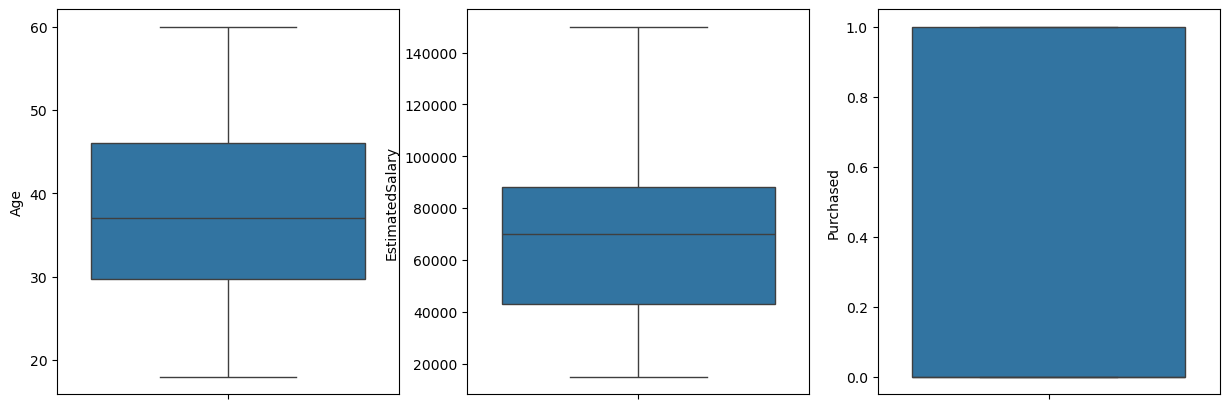

In [23]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 5))

sns.boxplot(data=df["Age"] , ax = axes[0])
sns.boxplot(data=df["EstimatedSalary"] , ax = axes[1])
sns.boxplot(data=df["Purchased"] , ax = axes[2])


**Label Encoding**

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Purchased"] = label_encoder.fit_transform(df["Purchased"])
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [25]:
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Gender"].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

In [26]:
df = df.drop(columns = ["User ID"])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [27]:
def min_max_normalization(feature):
    mini = df[feature].min()
    maxi = df[feature].max()

    df[feature] = (df[feature] - mini) / (maxi  - mini)
    return df[feature]


In [29]:
min_max_normalization("Age")
min_max_normalization("EstimatedSalary")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


**Test Train Logistic Regression**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

X = np.asarray(df.drop(["Purchased"] , axis = 1))
Y = np.asarray(df["Purchased"])

In [32]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3)


In [33]:
logistic_model.fit(X_train , Y_train)

LogisticRegression()

In [34]:
Y_pred = logistic_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test , Y_pred)

In [36]:
accuracy

0.8333333333333334

In [38]:
true_positive = ((Y_pred == 0) & (Y_test == 0)).sum()
false_positive = ((Y_pred == 0) & (Y_test == 1)).sum()

true_negative = ((Y_pred == 1) & (Y_test == 1)).sum()
false_negative = ((Y_pred == 1) & (Y_test == 0)).sum()

In [40]:
recall = true_positive / (true_positive + false_positive)
accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * (precision * recall) / (precision + recall)


In [41]:
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1_score)

Recall:  0.8390804597701149
Precision:  0.8390804597701149
Accuracy:  0.8333333333333334
F1 Score:  0.8390804597701149
